# Installing the important libraries

In [1]:
! pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


# Importing the used libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Exploratory Data Analysis (EDA)

In [4]:
df = pd.read_csv("/kaggle/input/laptop-price-dataset/laptop_price - dataset.csv")
df

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.30,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.30,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.30,1440x900,Intel,Core i5,1.80,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.60,Full HD 1920x1080,Intel,Core i5 7200U,2.50,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.40,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.70,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.30,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.10,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.00,IPS Panel Full HD / Touchscreen 1920x1080,Intel,Core i7 6500U,2.50,4,128GB SSD,Intel,HD Graphics 520,Windows 10,1.80,638.00
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.30,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel,Core i7 6500U,2.50,16,512GB SSD,Intel,HD Graphics 520,Windows 10,1.30,1499.00
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.00,1366x768,Intel,Celeron Dual Core N3050,1.60,2,64GB Flash Storage,Intel,HD Graphics,Windows 10,1.50,229.00
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.60,1366x768,Intel,Core i7 6500U,2.50,6,1TB HDD,AMD,Radeon R5 M330,Windows 10,2.19,764.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1), object(10)
me

In [6]:
df.describe()

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro)
count,1275.00,1275.00,1275.00,1275.00,1275.00
mean,15.02,2.30,8.44,2.04,1134.97
std,1.43,0.50,5.10,0.67,700.75
min,10.10,0.90,2.00,0.69,174.00
25%,14.00,2.00,4.00,1.50,609.00
50%,15.60,2.50,8.00,2.04,989.00
75%,15.60,2.70,8.00,2.31,1496.50
max,18.40,3.60,64.00,4.70,6099.00


In [7]:
df.isna().sum().sum()

0

In [8]:
df.duplicated().sum()

0

In [9]:
df_obj = df.select_dtypes(include='object')
df_obj.head()

,Company,Product,TypeName,ScreenResolution,CPU_Company,CPU_Type,Memory,GPU_Company,GPU_Type,OpSys
0,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel,Core i5,128GB SSD,Intel,Iris Plus Graphics 640,macOS
1,Apple,Macbook Air,Ultrabook,1440x900,Intel,Core i5,128GB Flash Storage,Intel,HD Graphics 6000,macOS
2,HP,250 G6,Notebook,Full HD 1920x1080,Intel,Core i5 7200U,256GB SSD,Intel,HD Graphics 620,No OS
3,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2880x1800,Intel,Core i7,512GB SSD,AMD,Radeon Pro 455,macOS
4,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel,Core i5,256GB SSD,Intel,Iris Plus Graphics 650,macOS


In [10]:
df_obj.columns

Index(['Company', 'Product', 'TypeName', 'ScreenResolution', 'CPU_Company',
       'CPU_Type', 'Memory', 'GPU_Company', 'GPU_Type', 'OpSys'],
      dtype='object')

# Visualization some information about dataset

### -Visualizing Common Value Counts for Categorical Features

Value counts for column: Company


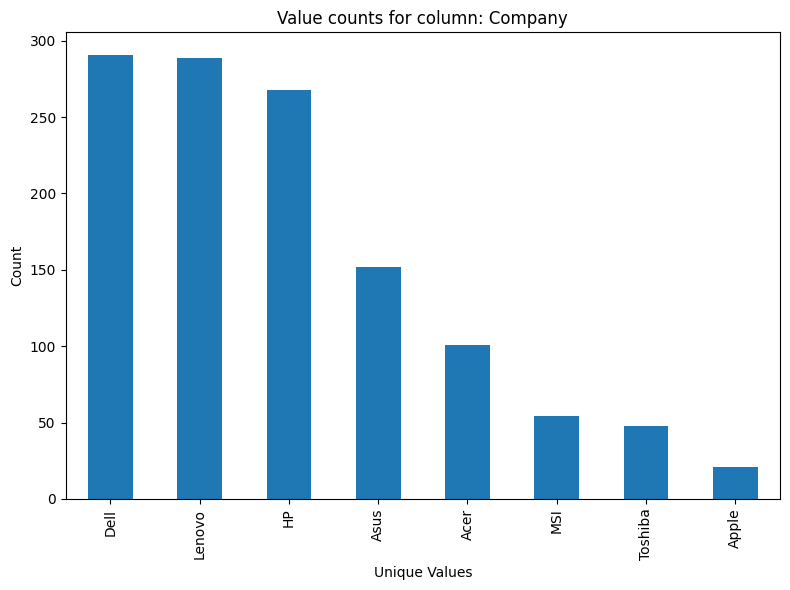

Value counts for column: Product


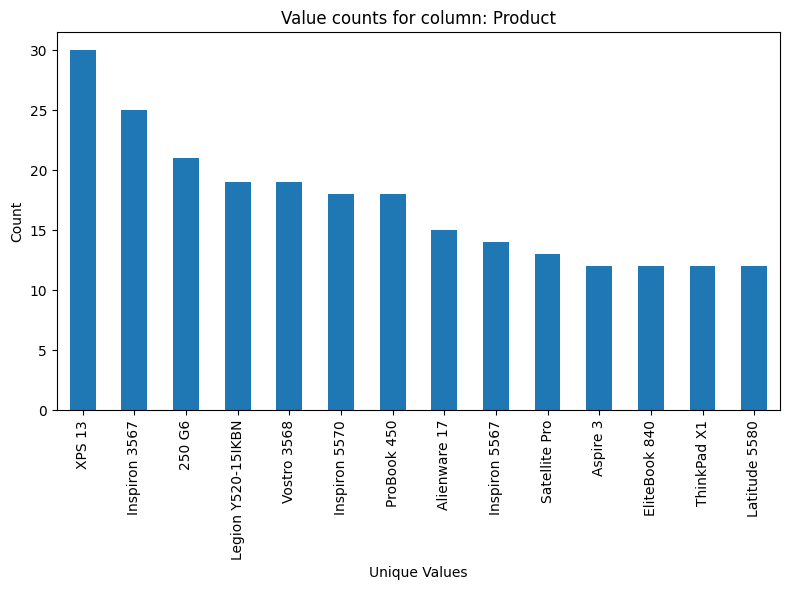

Value counts for column: TypeName


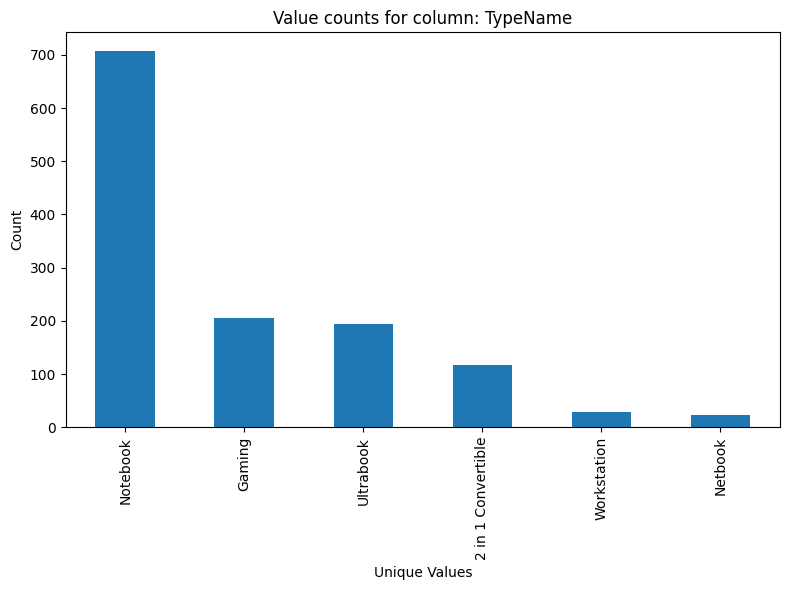

Value counts for column: ScreenResolution


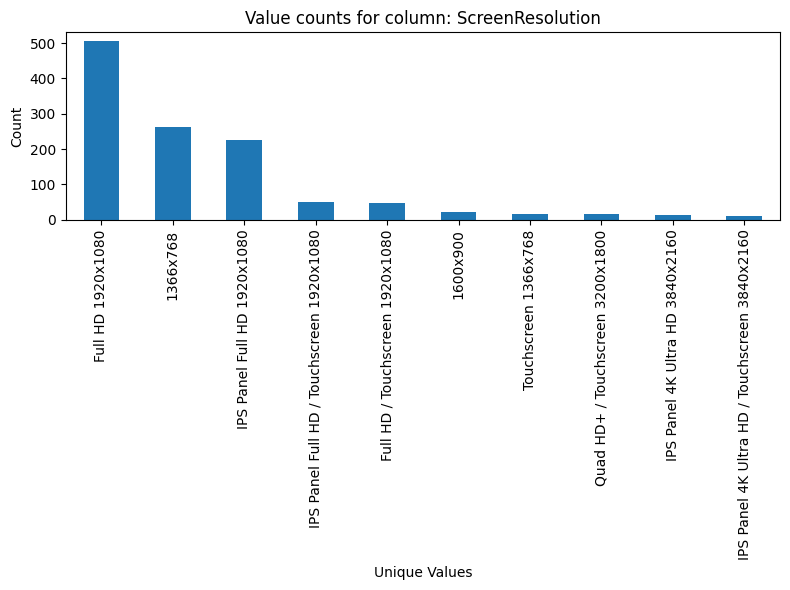

Value counts for column: CPU_Company


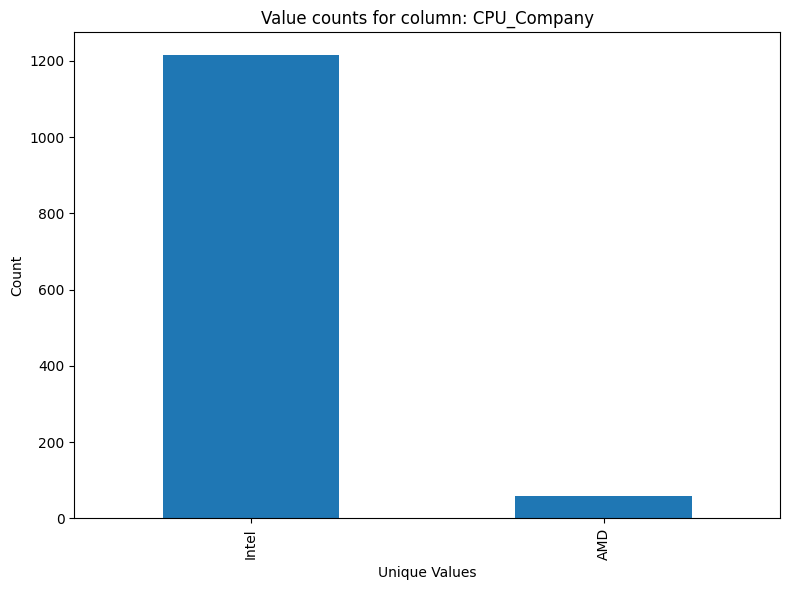

Value counts for column: CPU_Type


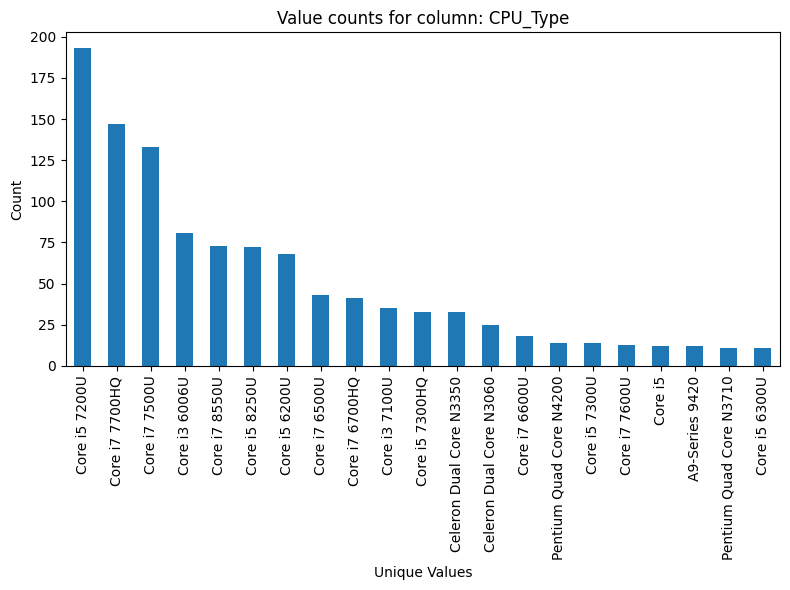

Value counts for column: Memory


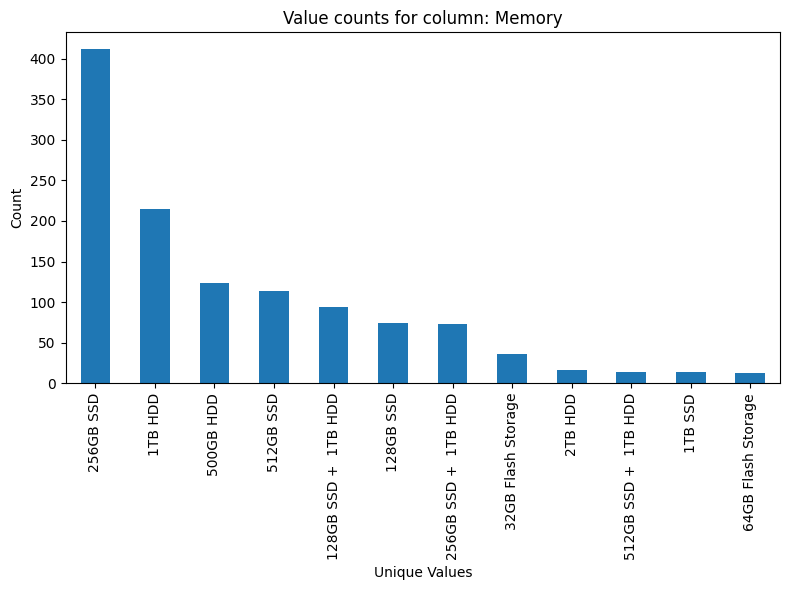

Value counts for column: GPU_Company


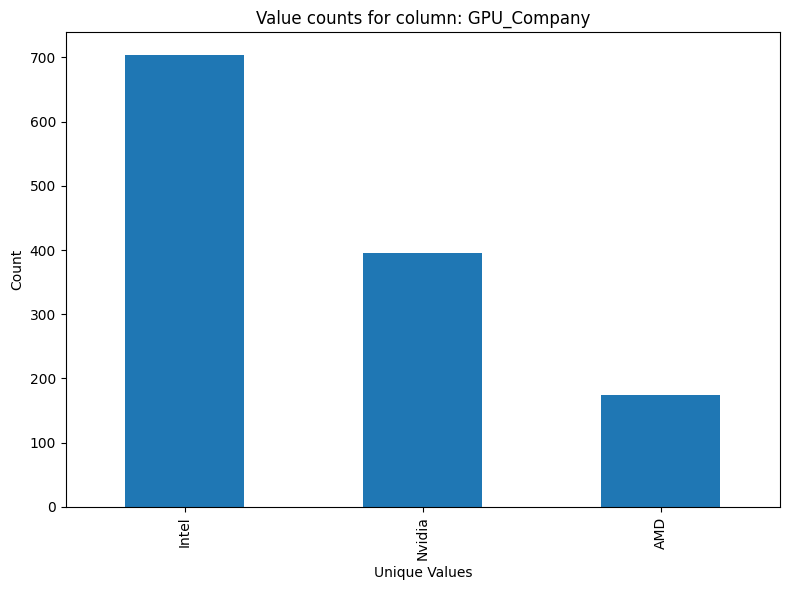

Value counts for column: GPU_Type


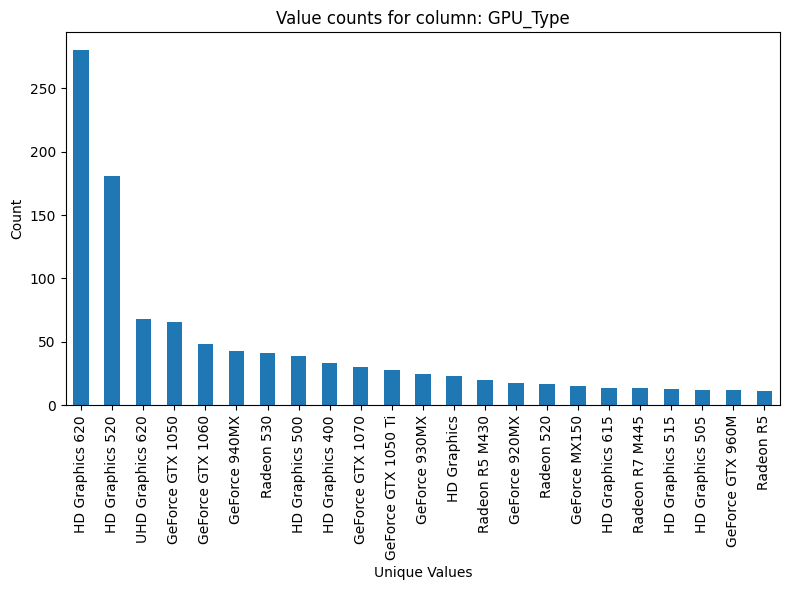

Value counts for column: OpSys


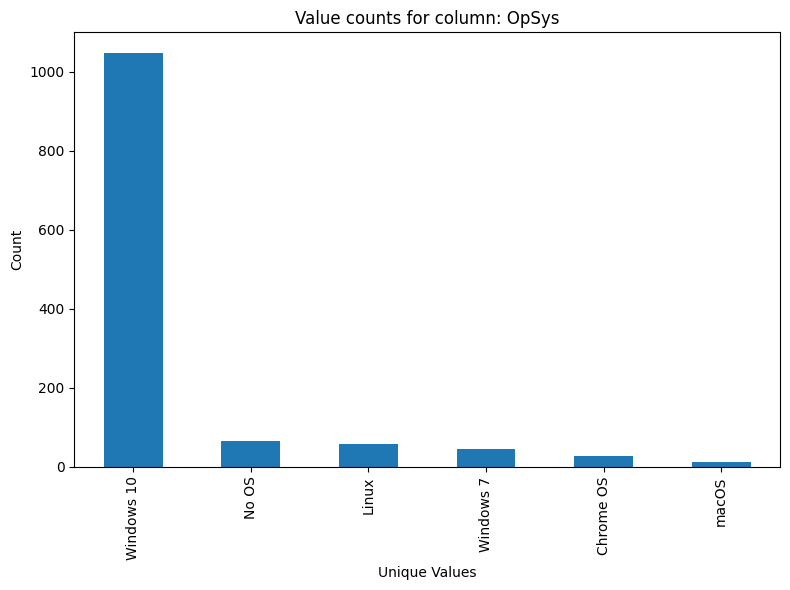

In [11]:
for col in df_obj.columns:
    print(f'Value counts for column: {col}')
    
    # Get the value counts for each column
    value_counts = df_obj[col].value_counts()
    
    # Filter for values that occur more than 10 times
    common_values = value_counts[value_counts > 10].index
    
    # Filter the DataFrame to include only the common values
    filtered_df = df_obj[df_obj[col].isin(common_values)]
    
    if not filtered_df.empty:
        # Get the updated value counts after filtering
        filtered_value_counts = filtered_df[col].value_counts()
        
        # Plot the value counts as a bar chart
        plt.figure(figsize=(8, 6))  # Adjust figure size as needed
        filtered_value_counts.plot(kind='bar')
        plt.title(f'Value counts for column: {col}')
        plt.xlabel('Unique Values')
        plt.ylabel('Count')
        plt.xticks(rotation=90)  # Rotate x-axis labels if needed
        plt.tight_layout()  # Adjust the layout to prevent overlap
        plt.show()


### -Analyzing Relationships: Numerical Features and Price (Euro)

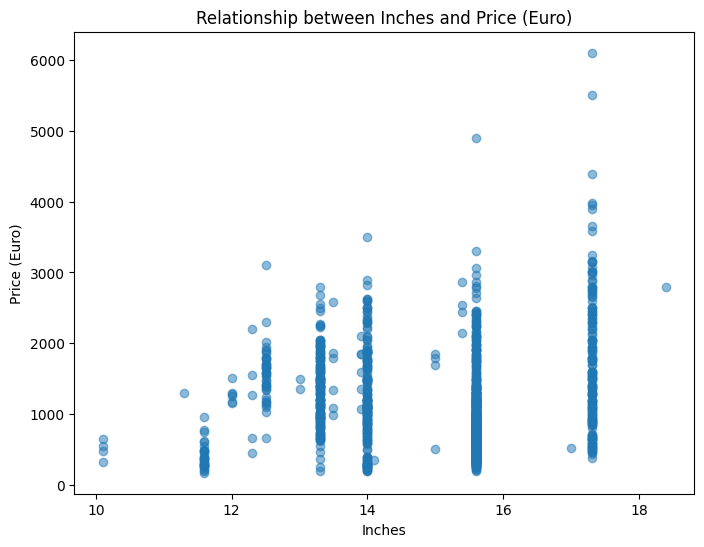

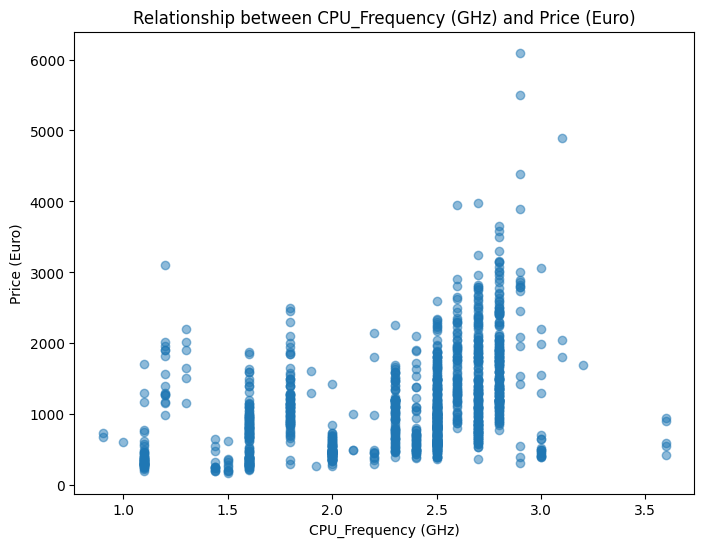

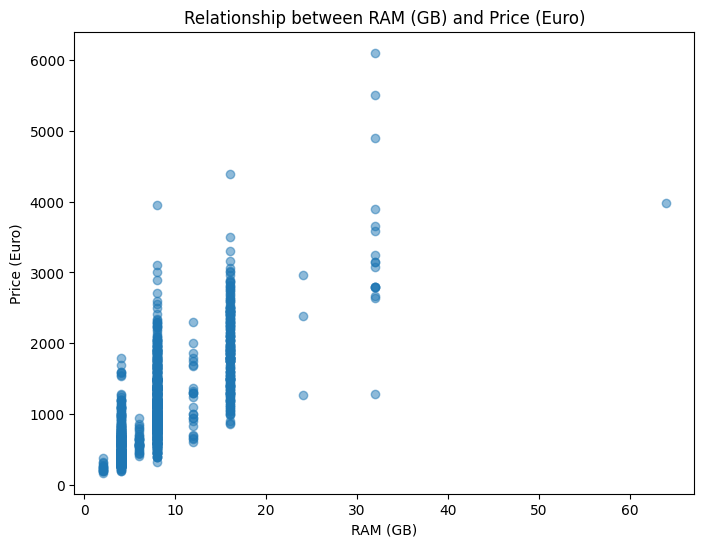

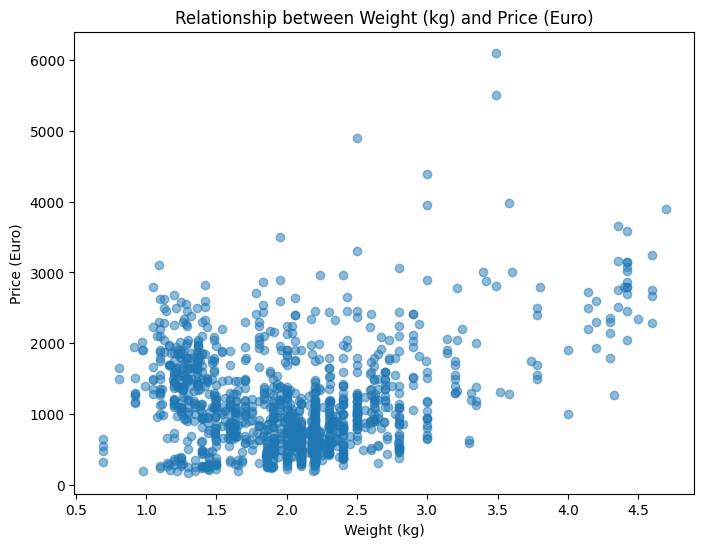

In [12]:
df_num = df.select_dtypes(exclude="object")
for col in df_num.columns:
    if col != 'Price (Euro)':  # Avoid plotting the target against itself
        plt.figure(figsize=(8, 6))
        plt.scatter(df_num[col], df_num['Price (Euro)'], alpha=0.5)
        plt.title(f'Relationship between {col} and Price (Euro)')
        plt.xlabel(col)
        plt.ylabel('Price (Euro)')
        plt.show()


### -Visualizing Price Variations Across Common Categorical Features

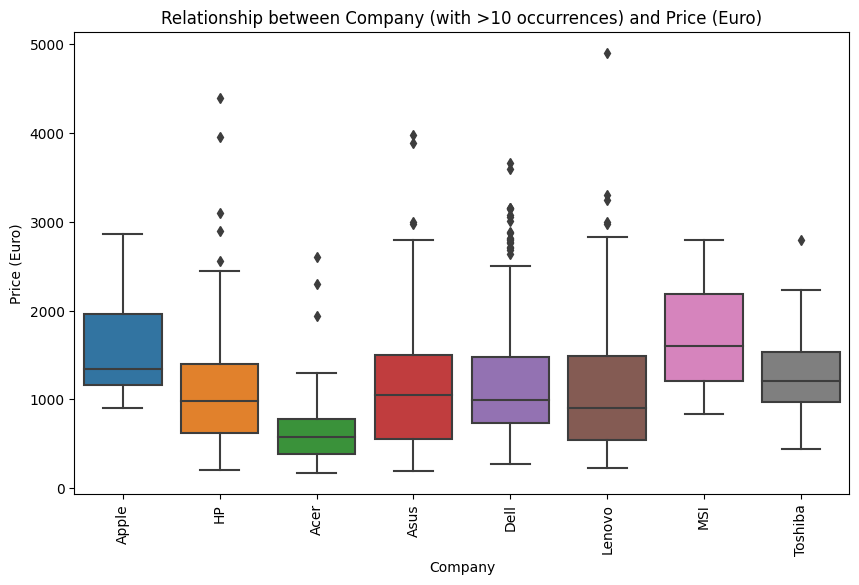

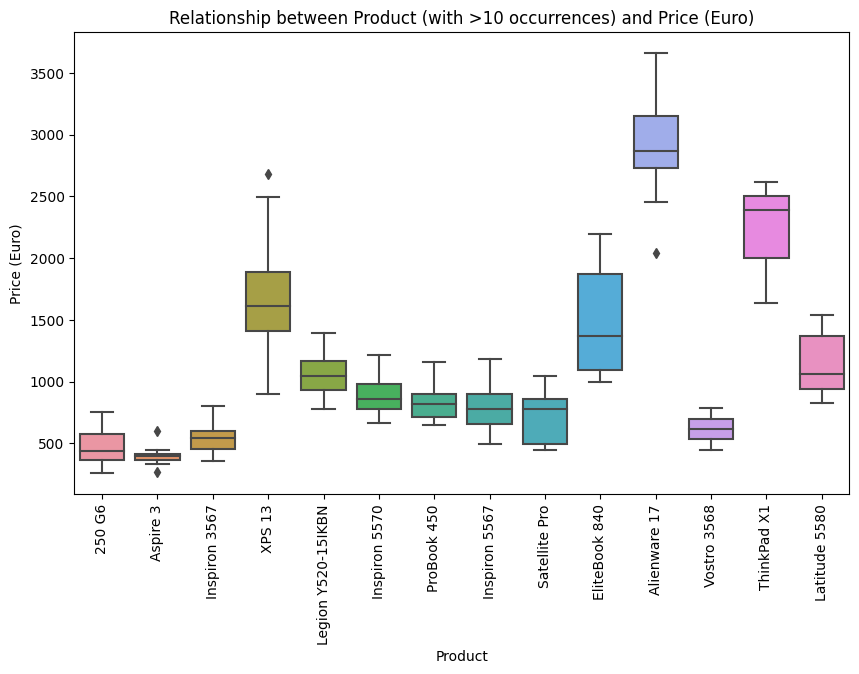

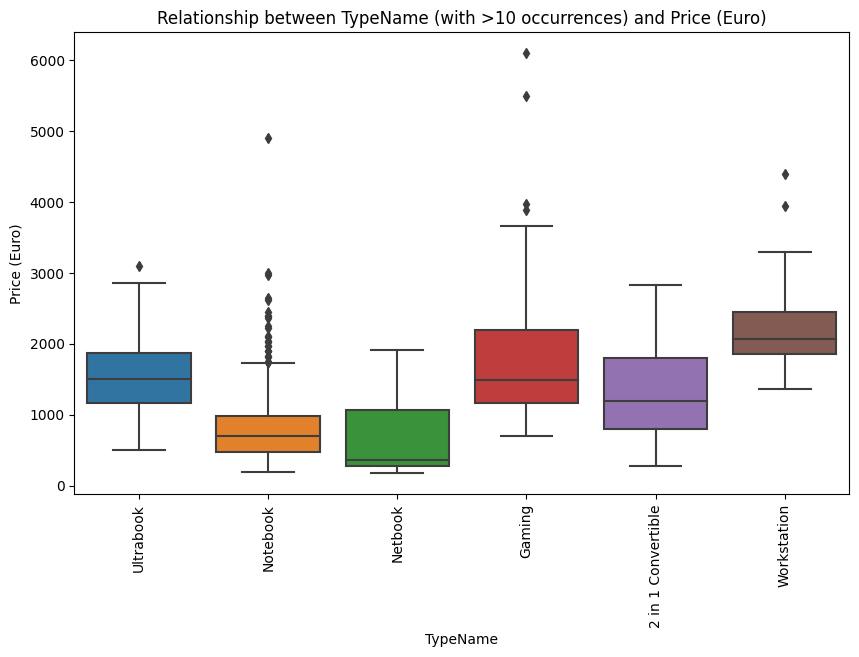

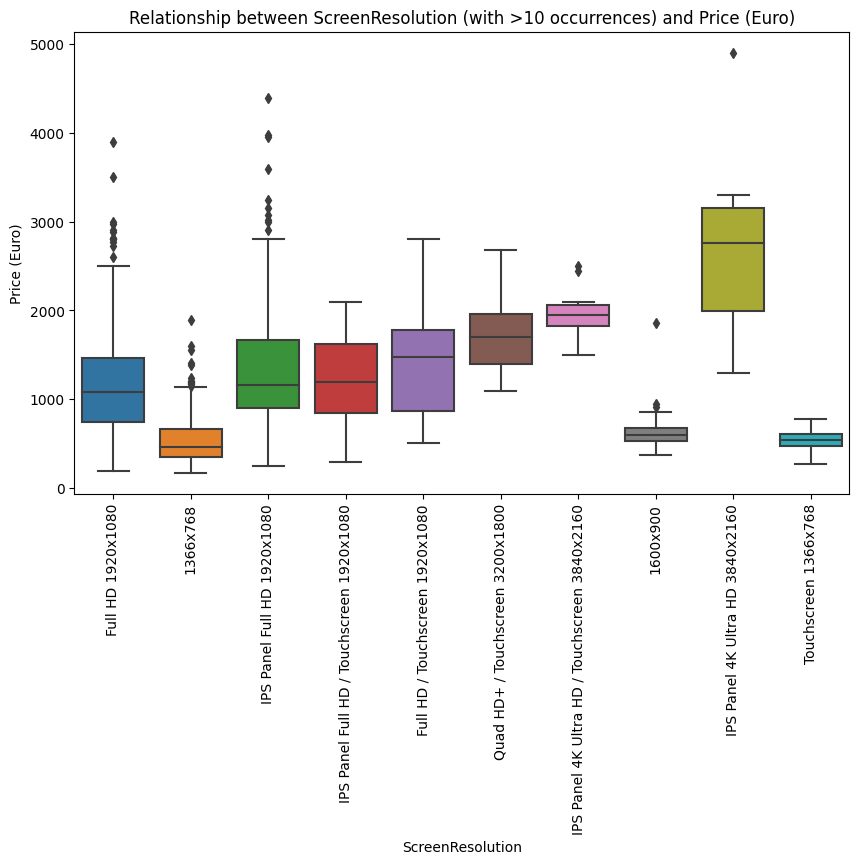

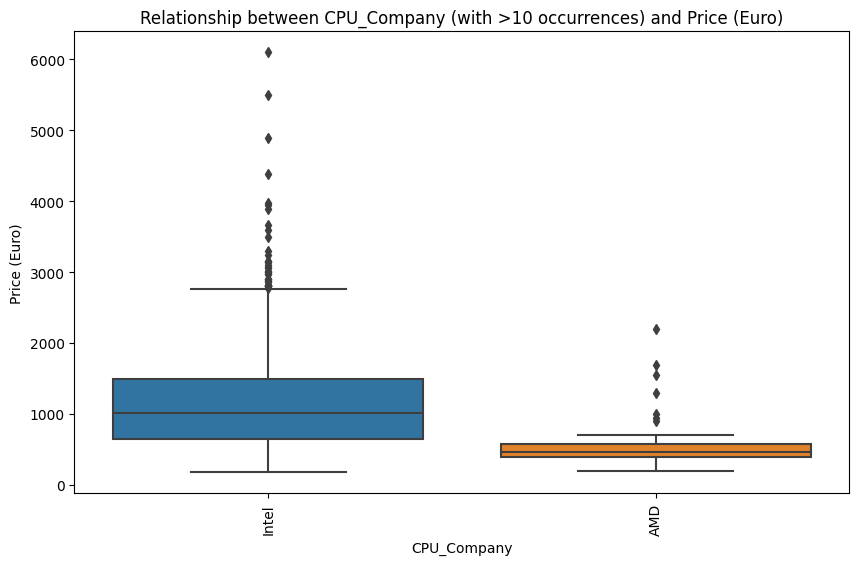

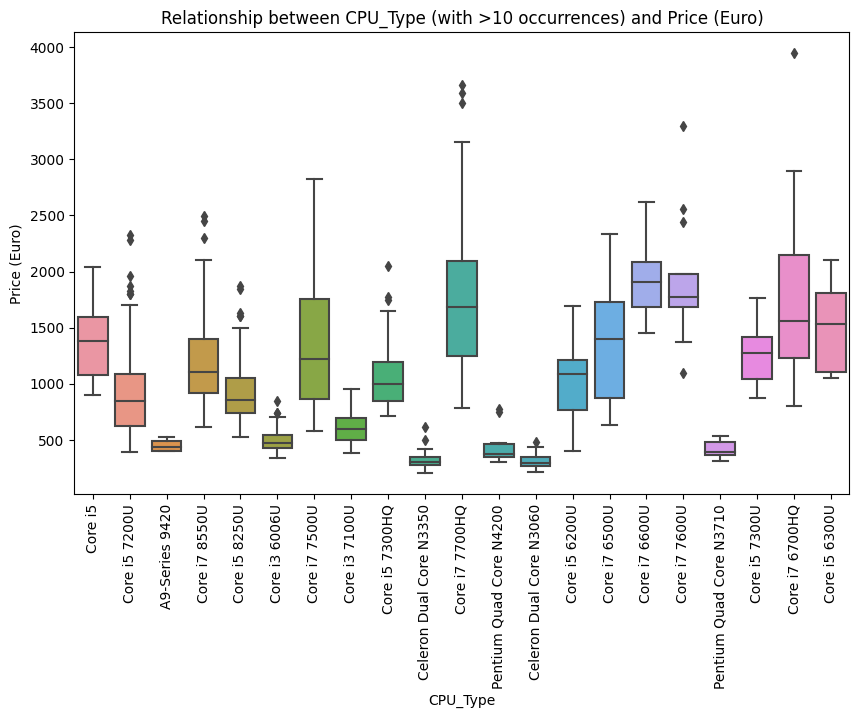

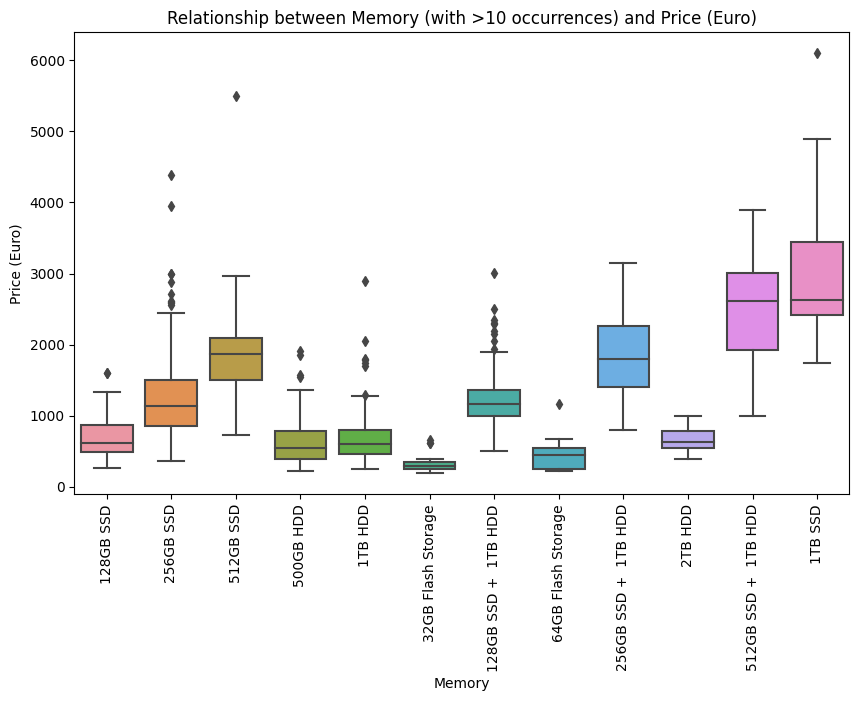

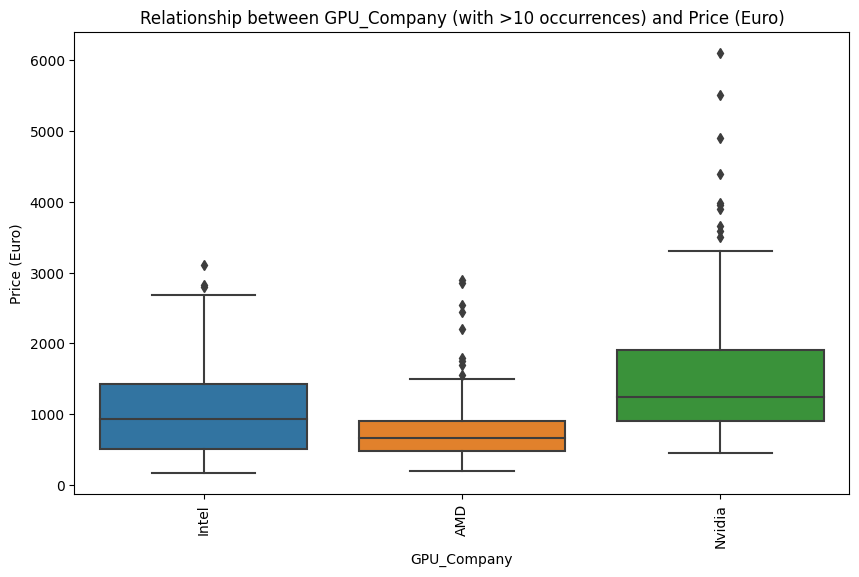

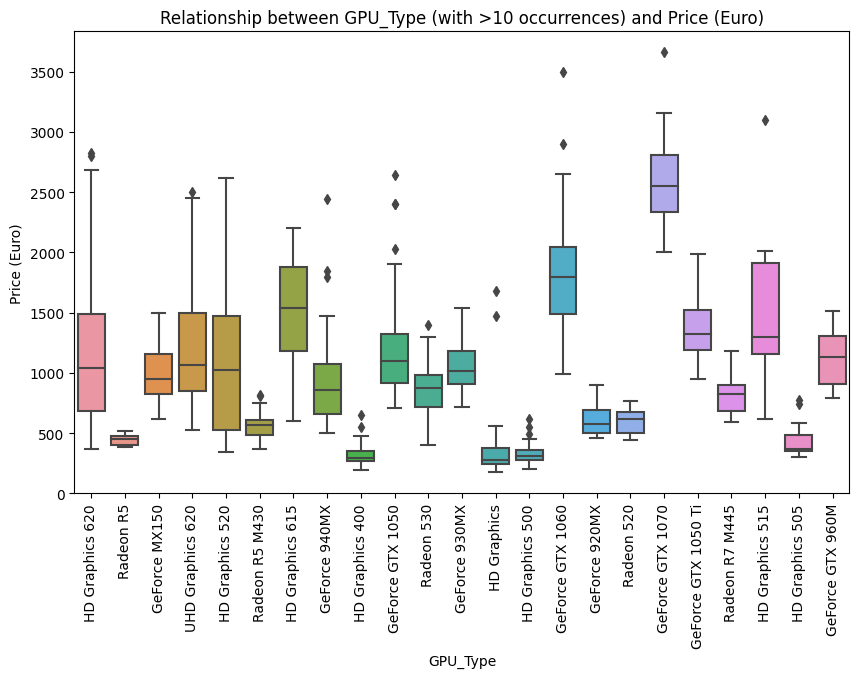

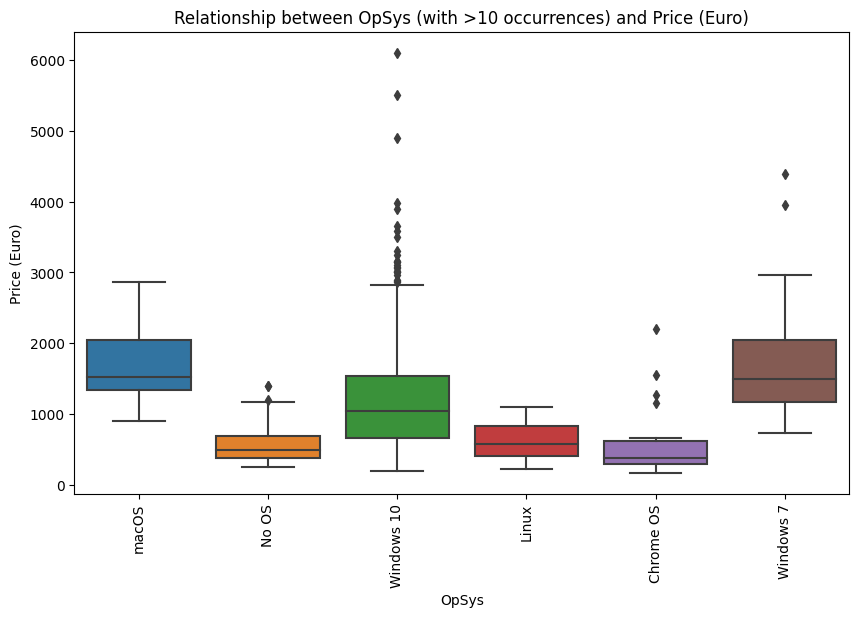

In [13]:
for col in df_obj.columns:

    value_counts = df_obj[col].value_counts()
    common_values = value_counts[value_counts > 10].index
        
    # Filter the DataFrame to include only the common values
    filtered_df = df_obj[df_obj[col].isin(common_values)]
        
    if not filtered_df.empty:  # Only plot if there are values to plot
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=filtered_df[col], y=df['Price (Euro)'])
        plt.title(f'Relationship between {col} (with >10 occurrences) and Price (Euro)')
        plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
        plt.show()


# Data Preprocessing

In [14]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.30,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.30,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.30,1440x900,Intel,Core i5,1.80,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.60,Full HD 1920x1080,Intel,Core i5 7200U,2.50,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.40,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.70,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.30,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.10,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


In [15]:
lb = LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col] = lb.fit_transform(df[col])

df.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,1,300,4,13.30,23,1,40,2.30,8,4,2,56,8,1.37,1339.69
1,1,301,4,13.30,1,1,40,1.80,8,2,2,50,8,1.34,898.94
2,7,50,3,15.60,8,1,46,2.50,8,16,2,52,4,1.86,575.00
3,1,300,4,15.40,25,1,54,2.70,16,29,0,76,8,1.83,2537.45
4,1,300,4,13.30,23,1,40,3.10,8,16,2,57,8,1.37,1803.60


In [16]:
X = df.drop("Price (Euro)",axis=1)
y = df["Price (Euro)"]

In [17]:
sta = StandardScaler()
X = sta.fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train.shape, X_test.shape

((1020, 14), (255, 14))

# Heat Map

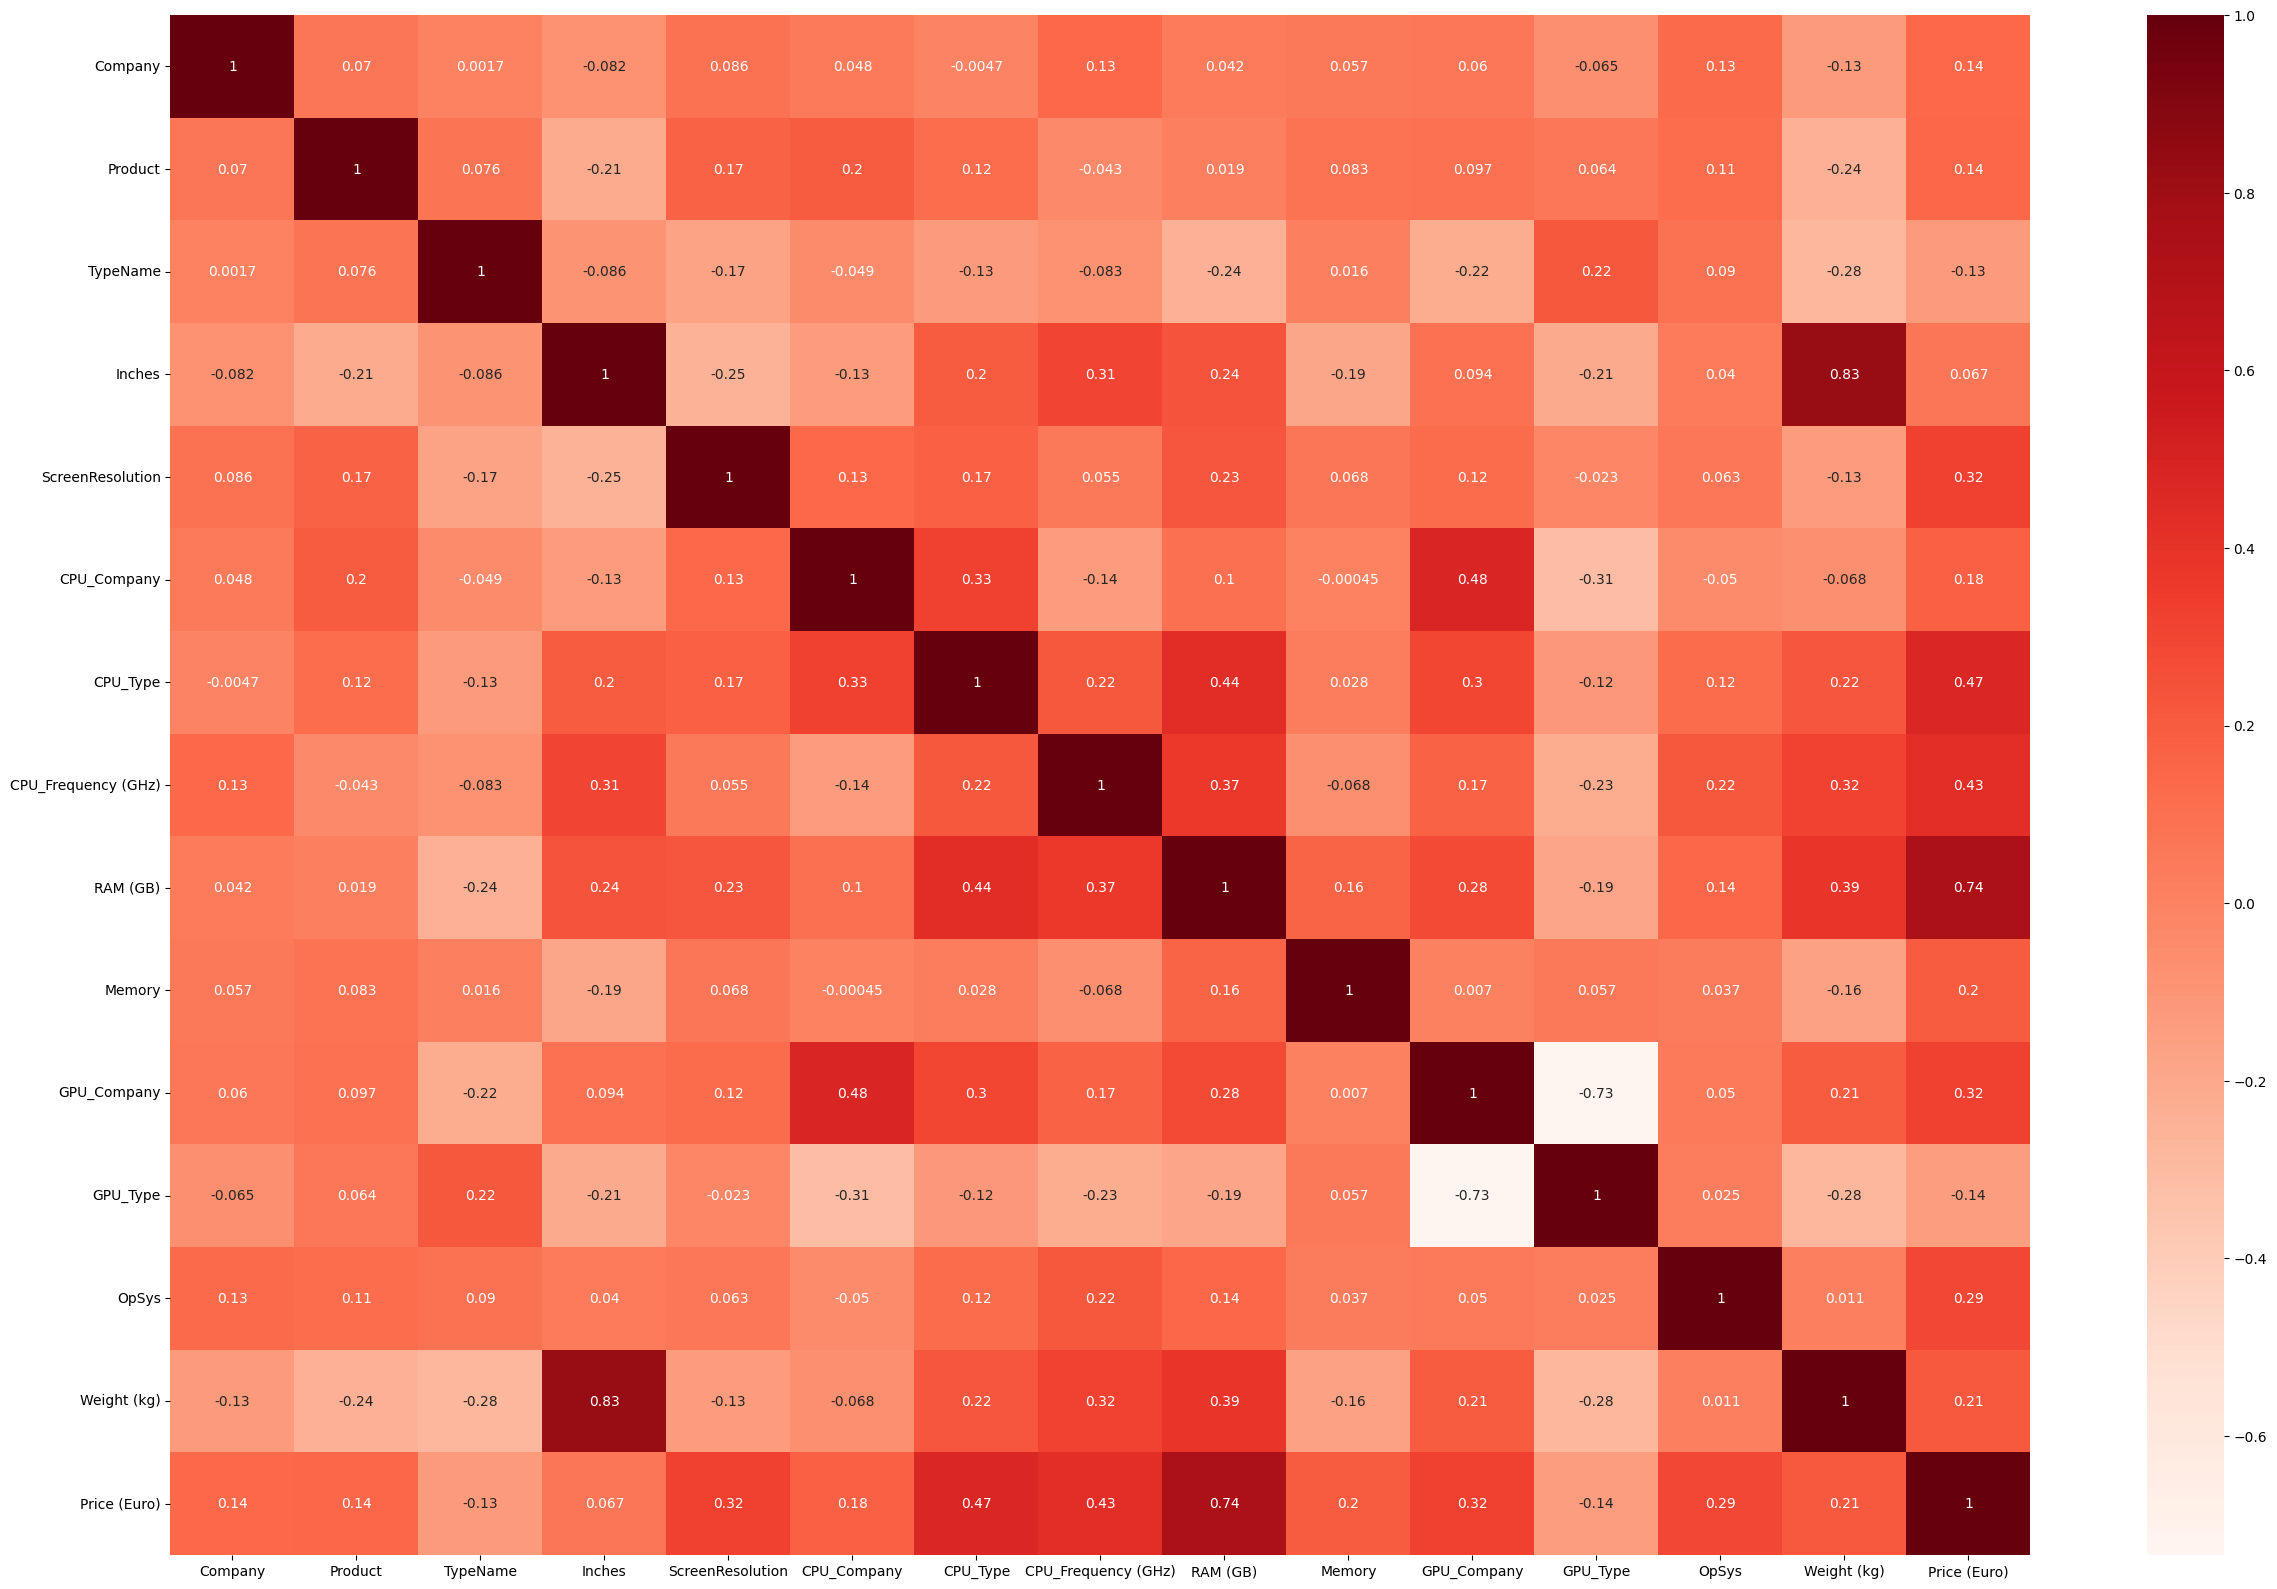

In [20]:
df_heatmap = df.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(df_heatmap, annot=True, cmap='Reds')
plt.show()

# Using and Evaluate LazyPredict

In [21]:
lazy_regressor = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = lazy_regressor.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [00:09<00:00,  4.26it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003760 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 627
[LightGBM] [Info] Number of data points in the train set: 1020, number of used features: 14
[LightGBM] [Info] Start training from score 1124.689293


In [22]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
XGBRegressor,0.90,0.90,219.80,0.22
ExtraTreesRegressor,0.89,0.89,230.83,0.41
GradientBoostingRegressor,0.88,0.89,237.11,0.31
RandomForestRegressor,0.86,0.87,256.39,0.64
BaggingRegressor,0.84,0.85,271.49,0.07
LGBMRegressor,0.83,0.84,284.47,0.12
HistGradientBoostingRegressor,0.83,0.84,285.31,0.45
KNeighborsRegressor,0.77,0.78,328.48,0.10
DecisionTreeRegressor,0.76,0.77,336.08,0.08


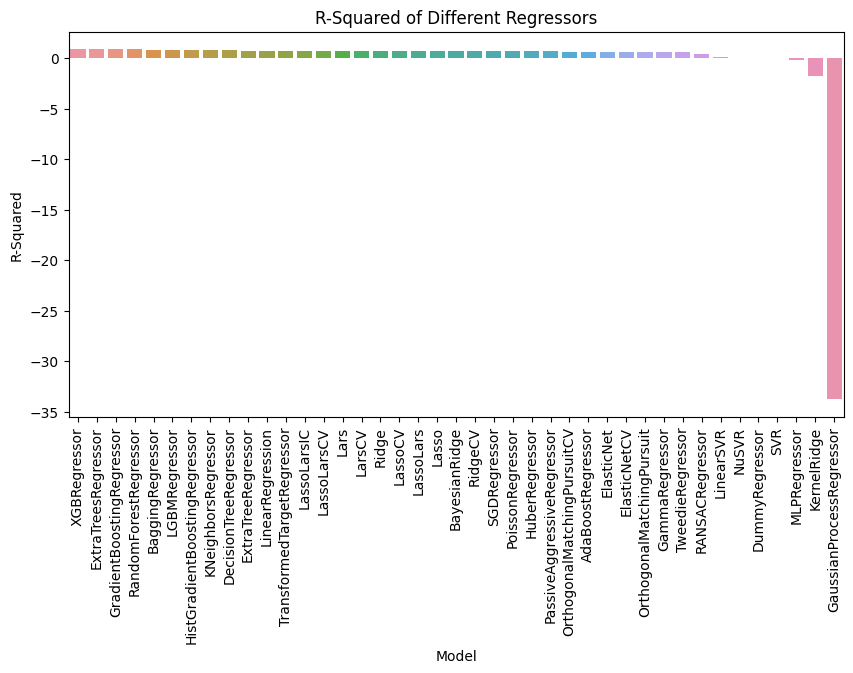

In [23]:
# Visualization of the R-Squared

plt.figure(figsize=(10, 5))
sns.barplot(x=models.index, y='R-Squared', data=models)
plt.xticks(rotation=90)
plt.title('R-Squared of Different Regressors')
plt.show()

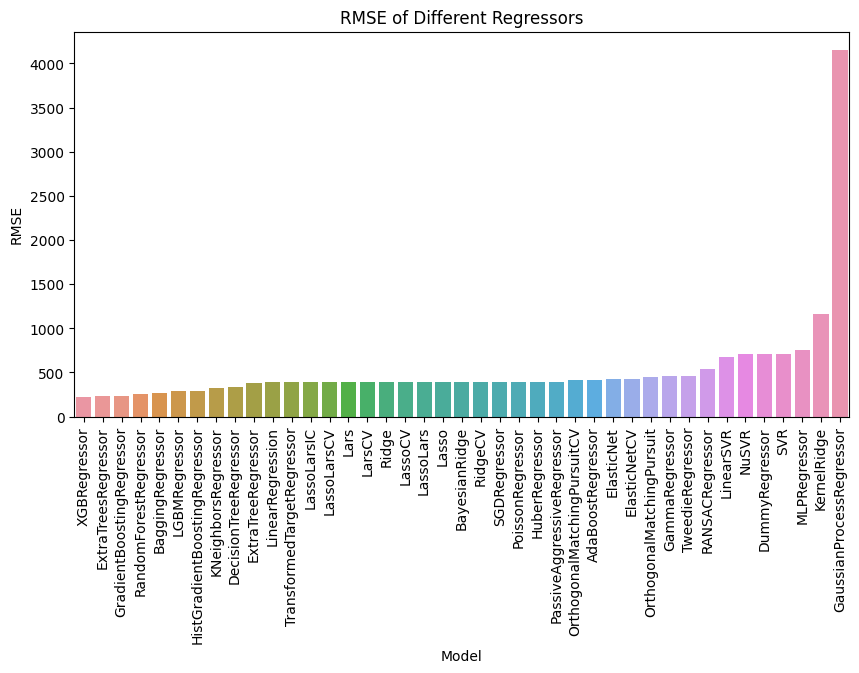

In [24]:
# Visualization of the RMSE

plt.figure(figsize=(10, 5))
sns.barplot(x=models.index, y='RMSE', data=models)
plt.xticks(rotation=90)
plt.title('RMSE of Different Regressors')
plt.show()

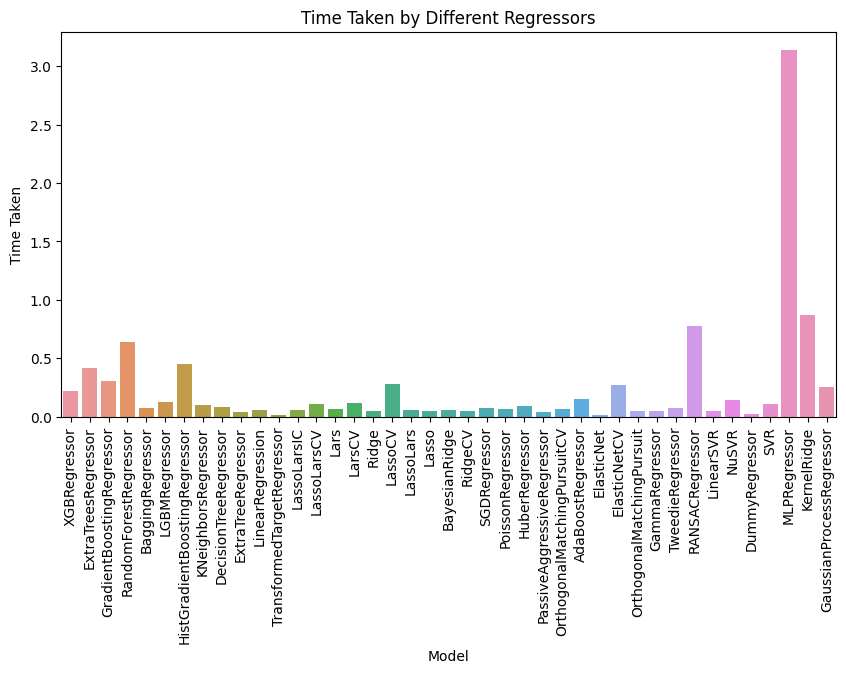

In [25]:
plt.figure(figsize=(10, 5))
sns.barplot(x=models.index, y='Time Taken', data=models)
plt.xticks(rotation=90)
plt.title('Time Taken by Different Regressors')
plt.show()

In [26]:
# Select the best-performing model based on R-Squared (or any other metric)
best_model_name = models.index[0]  
print(f"The best model is: {best_model_name}")

The best model is: XGBRegressor


# Using the best model: XGBRegressor

In [27]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score


xgb_model = XGBRegressor(random_state=42)

# Train the XGBRegressor model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'Root Mean Squared Error (RMSE): {mse}')
print(f'R-Squared: {r2}')

Root Mean Squared Error (RMSE): 219.79509407004574
R-Squared: 0.9026676190402406


**DON'T FORGET TO UPVOTE**